# Spaceship Titanic - Predicting which passengers are transported to an alternate dimension.

## Introduction

In this project, we are presented with an imaginary scenario where a spaceship *Titanic* is involved in a disaster, leading to half its passengers being transported to an alternate dimension. The goal is to predict which passengers are transported, based on damaged data from the spaceship's computers.

The following explains the features in the dataset that may need further explanation:
- PassengerID: A unique ID for each passengers. The first 4 digits represents the group they are travelling with, and the last 2 digits is their number within the group.
- CryoSleep: Passengers put into cryosleep for their voyage. If True, they are confined to their cabins.
- Cabin: Where the passenger is staying, in the form deck/num/side. Side can either be P for Port, or S for Starboard.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: Amount the passenger has billed at each of the amenities.

## Exploratory Data Analysis

### General

The 'train' dataset is first loaded to be analysed. The dataset seems to have a lot of missing data, which will need to be filled before the model is able to process it.

In [354]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [355]:
df = pd.read_csv('./train.csv')

In [356]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [357]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [358]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [360]:
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


### Cabin

From the background information provided, we know that the cabin number is formatted as 'Deck/Num/Side'. The data is obtained and split into different columns.

In [361]:
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split(r'/', expand=True)

After splitting, some further investigation is done to determine the values in each column. The 'Num' column is unlikely to have much significance as it is tied to the Deck/Side of the cabin, and may not be important on its own.

In [362]:
df['Deck'].value_counts().sort_index()

A     256
B     779
C     747
D     478
E     876
F    2794
G    2559
T       5
Name: Deck, dtype: int64

In [363]:
df['Num'].value_counts().head()

82    28
86    22
19    22
97    21
56    21
Name: Num, dtype: int64

In [364]:
df['Side'].value_counts()

S    4288
P    4206
Name: Side, dtype: int64

Dummy columns are created for columns with data for 'Cabin' (rows without this data will have Null instead) and then concatenated with the DataFrame.

In [365]:
concat = pd.get_dummies(df.loc[df['Cabin'].notna(), ['Deck', 'Side']])

In [366]:
df = pd.concat([df,concat], axis=1)

In [367]:
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### CryoSleep and Spending at Amenities

The data is provided with the amenities column as string data type, which will first need to be converted to float in order to perform mathematical operations on them.

In [368]:
df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].astype(float)
df['TotalAmenities_ignoreNa'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1, skipna=True)
df['TotalAmenities'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1, skipna=False)

First, the missing data for the amenities (room service, food court, shopping mall, spa, and VR deck) can be filled in. If passengers opt for cryosleep, it should be safe to assume that they will not be spending any money on those amenities. This is confirmed with .describe(), where the mean spending on all amenities for all passengers where there is data available, is 0.

In [369]:
df[df['CryoSleep']==True].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,TotalAmenities_ignoreNa,TotalAmenities
count,2955.000000,2969.0,2967.0,2941.0,2972.0,2975.0,2953.000000,2953.000000,2953.000000,2953.000000,2953.000000,2953.000000,2953.000000,2953.0,2953.000000,2953.000000,3037.0,2690.0
mean,27.405415,0.0,0.0,0.0,0.0,0.0,0.023027,0.141890,0.099560,0.035218,0.056891,0.186251,0.457162,0.0,0.480867,0.519133,0.0,0.0
std,15.080469,0.0,0.0,0.0,0.0,0.0,0.150016,0.348996,0.299463,0.184363,0.231674,0.389375,0.498246,0.0,0.499718,0.499718,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
25%,18.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
50%,26.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0
75%,37.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0
max,78.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0


In [370]:
df.loc[df['CryoSleep'] == True, ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = df.loc[df['CryoSleep'] == True, ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].fillna(0.0)

It is reasonable to assume that passengers who have missing values in the CryoSleep column who has spent money on amenities are not in Cryosleep.

In [371]:
df.loc[(df['TotalAmenities_ignoreNa']>0.0) & (df['CryoSleep'].isnull()), ['CryoSleep']] = df.loc[(df['TotalAmenities_ignoreNa']!=0.0) & (df['CryoSleep'].isnull()), ['CryoSleep']].fillna(False)

In [372]:
df['TotalAmenities_ignoreNa'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1, skipna=True)
df['TotalAmenities'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1, skipna=False)

While we are able to derive that the passengers who have spent on amenities are not in CryoSleep, the reverse cannot be assumed, as there are also passengers who did not go into CryoSleep, and spent 0 on the amenities.

In [373]:
df[(df['TotalAmenities_ignoreNa']==0.0) & (df['CryoSleep'].isnull())].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,TotalAmenities_ignoreNa,TotalAmenities
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
175,0198_01,Earth,NaN,G/30/P,PSO J318.5-22,52.0,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
266,0290_03,Europa,NaN,B/7/S,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
392,0433_01,Europa,NaN,B/20/P,55 Cancri e,27.0,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### PassengerID

From the information provided, the passengerID can be split into 2 parts - the group number, and an individual number. Those two numbers are split into two columns.

In [374]:
df[['GroupID', 'Num In Group']] = df['PassengerId'].str.split('_',expand=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,TotalAmenities_ignoreNa,TotalAmenities,GroupID,Num In Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0.0,1.0,0.0,0.0,0.0,1.0,736.0,736.0,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,10383.0,10383.0,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5176.0,5176.0,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1091.0,1091.0,0004,01


In [375]:
more_than_1_person_in_group = df[df['GroupID'].duplicated()]['GroupID'].to_list()
df[df['GroupID'].isin(more_than_1_person_in_group)].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,TotalAmenities_ignoreNa,TotalAmenities,GroupID,Num In Group
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,10383.0,10383.0,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5176.0,5176.0,0003,02
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1584.0,1584.0,0006,01
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0006,02
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0008,01


### HomePlanet and Spending Habits

The passengers aboard the ship come from only 3 planets: Earth, Europa, and Mars.

In [376]:
pd.Series(df['HomePlanet'].value_counts())

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [377]:
df['HomePlanet'].isnull().sum()

201

The passenger's spending habits also differ based on their home planet. For passengers with no missing data in any of the amenities columns and have spent more than 0.0 on those amenities, passengers from Europa spent the highest, with a large amount spent on the food court, spa, and VRDeck. 

Considering the mean, passengers from Mars spent more on room service and the shopping mall, and passengers from Earth had a balanced distribution of spending among all the amenities, and also spent the lowest.

In [378]:
df[(df['TotalAmenities'] != 0.0) & (df['TotalAmenities'].notna())][['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck', 'HomePlanet','TotalAmenities_ignoreNa']].groupby(["HomePlanet"]).describe().transpose()

HomePlanet                           Earth        Europa          Mars
RoomService             count  2561.000000   1013.000000    858.000000
                        mean    219.347520    278.260612   1018.631702
                        std     468.448855   1100.984277   1075.534331
                        min       0.000000      0.000000      0.000000
                        25%       0.000000      0.000000    230.750000
                        50%       4.000000      0.000000    797.500000
                        75%     240.000000      9.000000   1332.500000
                        max    6256.000000  14327.000000   9920.000000
FoodCourt               count  2561.000000   1013.000000    858.000000
                        mean    218.340492   2929.447187     94.931235
                        std     434.794026   3596.931088    326.645264
                        min       0.000000      0.000000      0.000000
                        25%       0.000000    494.000000      0.000000
                        50%       5.000000   1750.000000      0.000000
                        75%     231.000000   3960.000000      4.000000
                        max    4791.000000  29813.000000   4389.000000
ShoppingMall            count  2561.000000   1013.000000    858.000000
                        mean    213.310035    285.598223    571.931235
                        std     422.057603   1255.378244    808.677109
                        min       0.000000      0.000000      0.000000
                        25%       0.000000      0.000000     32.000000
                        50%       4.000000      0.000000    262.000000
                        75%     265.000000     10.000000    856.750000
                        max    4581.000000  23492.000000   7810.000000
Spa                     count  2561.000000   1013.000000    858.000000
                        mean    232.576728   1635.125370    203.241259
                        std     499.538724   2675.654203    532.152430
                        min       0.000000      0.000000      0.000000
                        25%       0.000000     48.000000      0.000000
                        50%       5.000000    485.000000      1.000000
                        75%     274.000000   2108.000000    122.750000
                        max    5577.000000  22408.000000   6011.000000
VRDeck                  count  2561.000000   1013.000000    858.000000
                        mean    218.848497   1612.323791     88.000000
                        std     440.696078   2575.126236    281.160912
                        min       0.000000      0.000000      0.000000
                        25%       0.000000     54.000000      0.000000
                        50%       6.000000    514.000000      0.000000
                        75%     275.000000   2047.000000      6.000000
                        max    5321.000000  20336.000000   2336.000000
TotalAmenities_ignoreNa count  2561.000000   1013.000000    858.000000
                        mean   1102.423272   6740.755183   1976.735431
                        std     709.377563   4878.071880   1258.444934
                        min     336.000000   1172.000000    434.000000
                        25%     739.000000   3511.000000   1190.250000
                        50%     841.000000   5320.000000   1576.000000
                        75%    1127.000000   8041.000000   2385.000000
                        max    6335.000000  35987.000000  10801.000000

In [379]:
df[df['HomePlanet'].isnull()][['HomePlanet','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalAmenities_ignoreNa']].head()

,HomePlanet,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalAmenities_ignoreNa
59,NaN,0.0,0.0,0.0,0.0,0.0,0.0
113,NaN,0.0,2344.0,0.0,65.0,6898.0,9307.0
186,NaN,0.0,0.0,0.0,0.0,0.0,0.0
225,NaN,313.0,1.0,691.0,283.0,0.0,1288.0
234,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [380]:
df[df['TotalAmenities'].isna()][['HomePlanet','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalAmenities']].head()

,HomePlanet,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalAmenities
16,Mars,1286.0,122.0,NaN,0.0,0.0,NaN
35,Mars,NaN,0.0,1750.0,990.0,0.0,NaN
48,Earth,790.0,0.0,0.0,NaN,0.0,NaN
95,Earth,0.0,NaN,0.0,0.0,17.0,NaN
111,Mars,0.0,0.0,0.0,0.0,NaN,NaN


In [381]:
df = pd.concat([df, pd.get_dummies(df['HomePlanet'])], axis=1)

<Axes: >

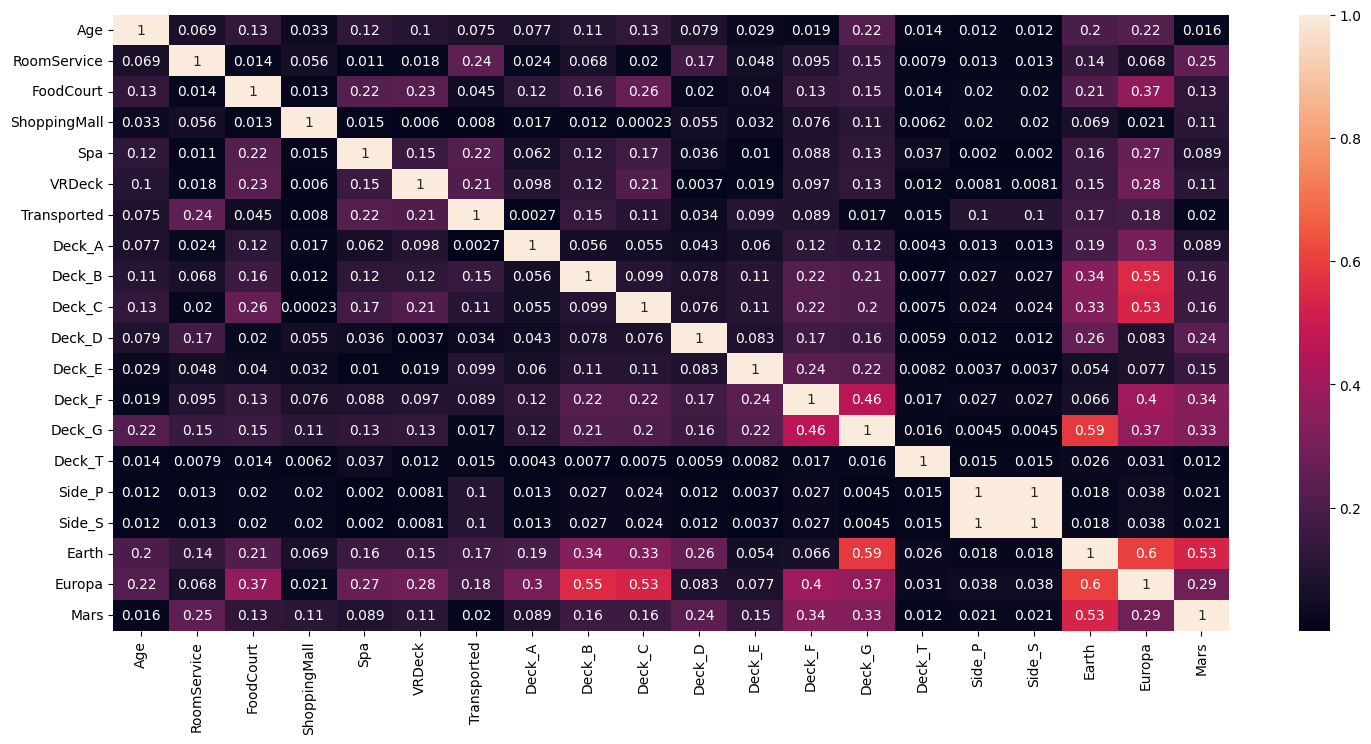

In [382]:
plt.figure(figsize=(18,8))
sns.heatmap(np.abs(df.drop(['TotalAmenities','TotalAmenities_ignoreNa'], axis=1).corr()), annot=True)

From the above heatmap, it appears that the HomePlanet and Deck of each passenger have some correlation. A distribution plot is created to illustrate the findings.

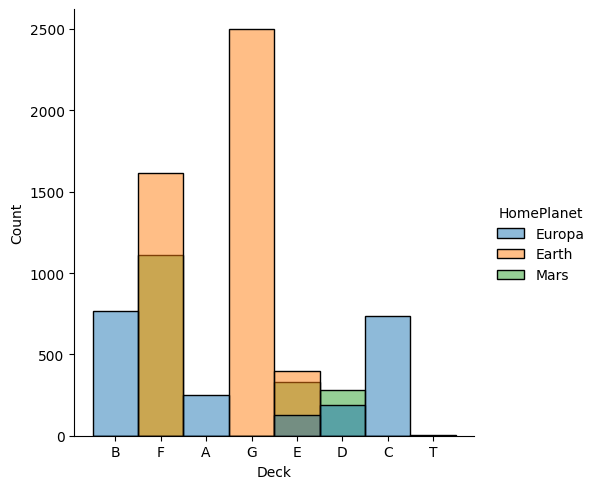

In [383]:
sns.displot(df, x='Deck', hue='HomePlanet')

There are a few passengers in Deck T which cannot be seen properly. The DataFrame is filtered to show the passenger information for Deck T.

In [384]:
df[df['Deck']=='T']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Deck_T,Side_P,Side_S,TotalAmenities_ignoreNa,TotalAmenities,GroupID,Num In Group,Earth,Europa,Mars
1004,1071_01,NaN,False,T/0/P,TRAPPIST-1e,35.0,False,415.0,1328.0,0.0,...,1.0,1.0,0.0,1817.0,1817.0,1071,01,0,0,0
2254,2414_01,Europa,False,T/1/P,TRAPPIST-1e,42.0,False,0.0,1829.0,2.0,...,1.0,1.0,0.0,7411.0,7411.0,2414,01,0,1,0
2734,2935_01,Europa,False,T/2/P,TRAPPIST-1e,33.0,False,0.0,28.0,0.0,...,1.0,1.0,0.0,7412.0,7412.0,2935,01,0,1,0
2763,2971_01,Europa,False,T/3/P,TRAPPIST-1e,38.0,False,0.0,3135.0,0.0,...,1.0,1.0,0.0,3164.0,3164.0,2971,01,0,1,0
4565,4863_01,Europa,False,T/2/S,TRAPPIST-1e,37.0,False,1721.0,667.0,NaN,...,1.0,0.0,1.0,3778.0,NaN,4863,01,0,1,0


From the above plot and DataFrame, it seems that a passenger's deck and their home planet is related, assuming that the destroyed data is destroyed randomly (as opposed to a hypothetical hijacker purposely removing data that fits a certain criteria).

#### Predicting Home Planet with Another Model

In this section, we will evaluate if the home planet can be accurately predicted using another model. All the rows with missing data will be excluded from the train and test data sets.

In [385]:
home_data = df[(df['HomePlanet'].notnull()) & (df['TotalAmenities'].notnull()) & (df['Cabin'].notnull())][['HomePlanet','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalAmenities','Deck_A', 'Deck_B','Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_P','Side_S']]

In [386]:
X = home_data.drop('HomePlanet', axis=1)
y = home_data['HomePlanet']

In [387]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [388]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [389]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [390]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': list(range(50, 200, 10))
}
grid_model = GridSearchCV(model, param_grid)

In [391]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140, 150, 160, 170, 180, 190]})

In [392]:
y_pred = grid_model.predict(X_test)

In [393]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Earth       0.97      0.97      0.97       419
      Europa       0.97      0.96      0.96       200
        Mars       0.87      0.88      0.87       157

    accuracy                           0.95       776
   macro avg       0.94      0.94      0.94       776
weighted avg       0.95      0.95      0.95       776



In [394]:
accuracy_score(y_test, y_pred)

0.9484536082474226

In [395]:
missing_home_data = df[(df['Deck'].notnull()) & (df['TotalAmenities'].notnull()) & (df['HomePlanet'].isnull())][['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalAmenities','Deck_A', 'Deck_B','Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_P','Side_S']]

In [396]:
home_predict = grid_model.predict(missing_home_data)

In [397]:
len(home_predict)

188

The model is fairly accurate at predicting the home planet based on the Deck and spending, with a 94.5% chance of predicting the correct home planet when those data are given. 188 rows with missing home planet data can then be filled in using that data.

In [398]:
home_fill = pd.Series(home_predict, index=df.loc[(df['Deck'].notnull()) & (df['TotalAmenities'].notnull()) & (df['HomePlanet'].isnull()), ['HomePlanet']].index)

In [399]:
df[df['HomePlanet'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Deck_T,Side_P,Side_S,TotalAmenities_ignoreNa,TotalAmenities,GroupID,Num In Group,Earth,Europa,Mars
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0064,02,0,0,0
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,...,0.0,1.0,0.0,9307.0,9307.0,0119,01,0,0,0
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0210,01,0,0,0
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,...,0.0,0.0,1.0,1288.0,1288.0,0242,01,0,0,0
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0251,01,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,...,0.0,1.0,0.0,1299.0,1299.0,9084,01,0,0,0
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,...,0.0,0.0,1.0,7177.0,7177.0,9194,01,0,0,0
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,...,0.0,0.0,1.0,2416.0,2416.0,9248,01,0,0,0
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,...,0.0,1.0,0.0,1148.0,1148.0,9257,01,0,0,0


In [400]:
df[['GroupID', 'Earth', 'Europa', 'Mars']].corr()

,Earth,Europa,Mars
Earth,1.000000,-0.604411,-0.534195
Europa,-0.604411,1.000000,-0.287022
Mars,-0.534195,-0.287022,1.000000


In [405]:
df.loc[(df['Deck'].notnull()) & (df['TotalAmenities'].notnull()) & (df['HomePlanet'].isnull()), ['HomePlanet']] = home_fill

In [406]:
def engineer_data(df):
    df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split(r'/', expand=True)
    concat = pd.get_dummies(df.loc[df['Cabin'].notna(), ['Deck', 'Side']])
    df = pd.concat([df,concat], axis=1)

    df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].astype(float)
    df['TotalAmenities_ignoreNa'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1, skipna=True)
    df['TotalAmenities'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1, skipna=False)
    df.loc[df['CryoSleep'] == True, ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = df.loc[df['CryoSleep'] == True, ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].fillna(0.0)
    df.loc[(df['TotalAmenities_ignoreNa']>0.0) & (df['CryoSleep'].isnull()), ['CryoSleep']] = df.loc[(df['TotalAmenities_ignoreNa']!=0.0) & (df['CryoSleep'].isnull()), ['CryoSleep']].fillna(False)
    df['TotalAmenities_ignoreNa'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1, skipna=True)
    df['TotalAmenities'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1, skipna=False)

    home_fill = pd.Series(home_predict, index=df.loc[(df['Deck'].notnull()) & (df['TotalAmenities'].notnull()) & (df['HomePlanet'].isnull()), ['HomePlanet']].index)
    df.loc[(df['Deck'].notnull()) & (df['TotalAmenities'].notnull()) & (df['HomePlanet'].isnull()), ['HomePlanet']] = home_fill
    

The following assumptions were made:
- Passengers going into CryoSleep do not spend money on amenities.
- Passengers who have spent money on amenities are not in CryoSleep.
- Data is evenly destroyed

In [409]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Deck_T,Side_P,Side_S,TotalAmenities_ignoreNa,TotalAmenities,GroupID,Num In Group,Earth,Europa,Mars
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0001,01,0,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0.0,0.0,1.0,736.0,736.0,0002,01,1,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0.0,0.0,1.0,10383.0,10383.0,0003,01,0,1,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0.0,0.0,1.0,5176.0,5176.0,0003,02,0,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,0.0,0.0,1.0,1091.0,1091.0,0004,01,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,0.0,1.0,0.0,8536.0,8536.0,9276,01,0,1,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,9278,01,1,0,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,0.0,0.0,1.0,1873.0,1873.0,9279,01,1,0,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,0.0,0.0,1.0,4637.0,4637.0,9280,01,0,1,0
